## Stock_Model notebook for creating html (or pdf) files

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
#import required modules
#be sure to set your $PYTHONPATH!
#else, try this:

#import sys
#sys.path.append('../../lib')
#sys.path.append('../../bin')

from model import MODEL
import utils, plotting, fstats, fstats_pct_chg
import pandas as pd

In [17]:
#your intra-day time at which to evaluate the model.
day_hour = 15
day_minute = 30
#your tickers of interest
tickers = ['TSLA', 'AMZN']

In [18]:
#do not edit below this cell!

In [53]:
#specify dates:
todays_date = pd.Timestamp.today()
start_date = todays_date - pd.Timedelta('200 days')
filter_date = start_date.floor(freq='D').replace(hour=day_hour, minute=day_minute)
#get data:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
#filter by datetime:
date_range = utils.create_date_range(start_date=filter_date)
model.apply_date_filter(date_range, force_apply=True)

[*********************100%***********************]  2 of 2 completed
[WARNING]: "force_apply" is active. Removing 126 NaN values.
[INFO]: filter applied.
[*********************100%***********************]  2 of 2 completed

In [20]:
#evaluate model:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 1.0                                  |
|                 Authors: Patrick Lorenz &  Marco Rosenzweig                  |
--------------------------------------------------------------------------------
|                          ticker = ['TSLA', 'AMZN']                           |
|                            start date = 03/12/20                             |
|                             end date = 09/25/20                              |
|                     initial investment per ticker = 200                      |
[INIT]: Initialising model for tickers: ['TSLA', 'AMZN']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
********************************************************************************
[TICKER]: TSLA
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the pe

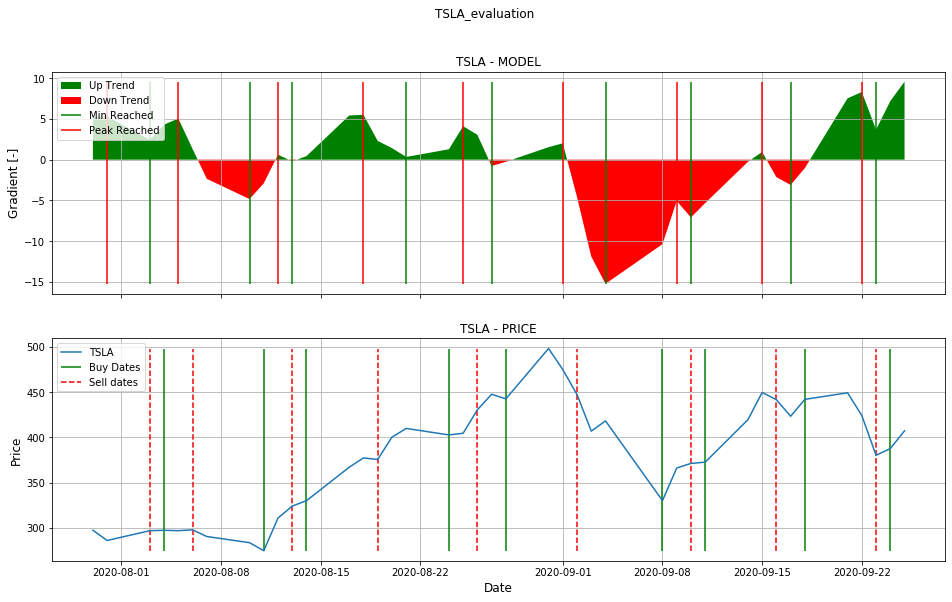

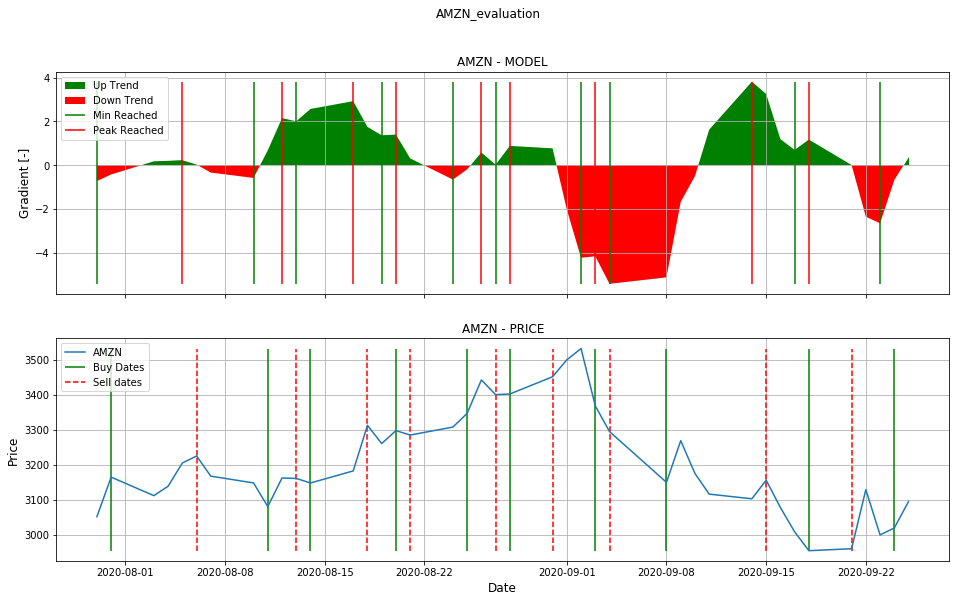

In [21]:
#plotting:
plot_date = todays_date - pd.Timedelta('60 days')
plot_start = str(plot_date.date())
plotting.plot_model(model, tickers='all', plot_from_date=plot_start)

In [27]:
#Computing break values:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='TSLA', parallel_computing=True, refactor_step_size=10)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: TSLA
[INFO]: Using 4 processes.


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [40]:
#plotting possible break value situations:
imag_model.show_possibilities(plot_from_date=plot_start, switch_axes=False)

[INFO]: Current ticker: TSLA
[WARNING]: Last value of data set is not NaN!
[USER-INPUT]: Proceed anyways? n
[INFO]: Current ticker: AMZN
[WARNING]: Last value of data set is not NaN!
[USER-INPUT]: Proceed anyways? n
